In [4]:
%matplotlib inline

import main
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
schemes = {
    "Forward difference": main.forward_difference,
    "Backward difference": main.backward_difference,
    "Centrered difference": main.central_difference
}

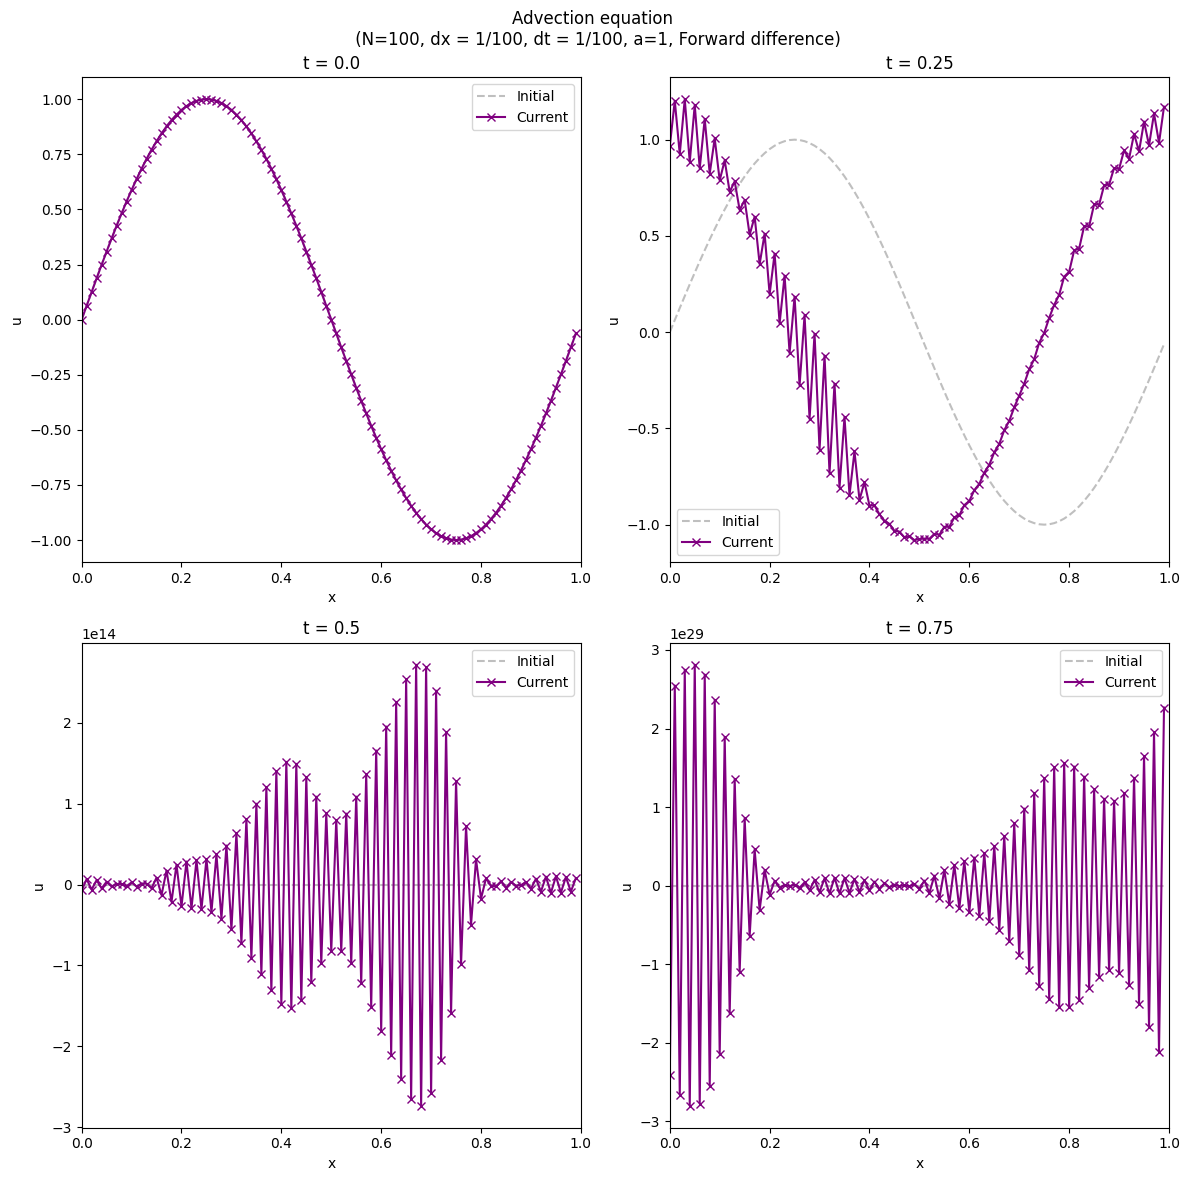

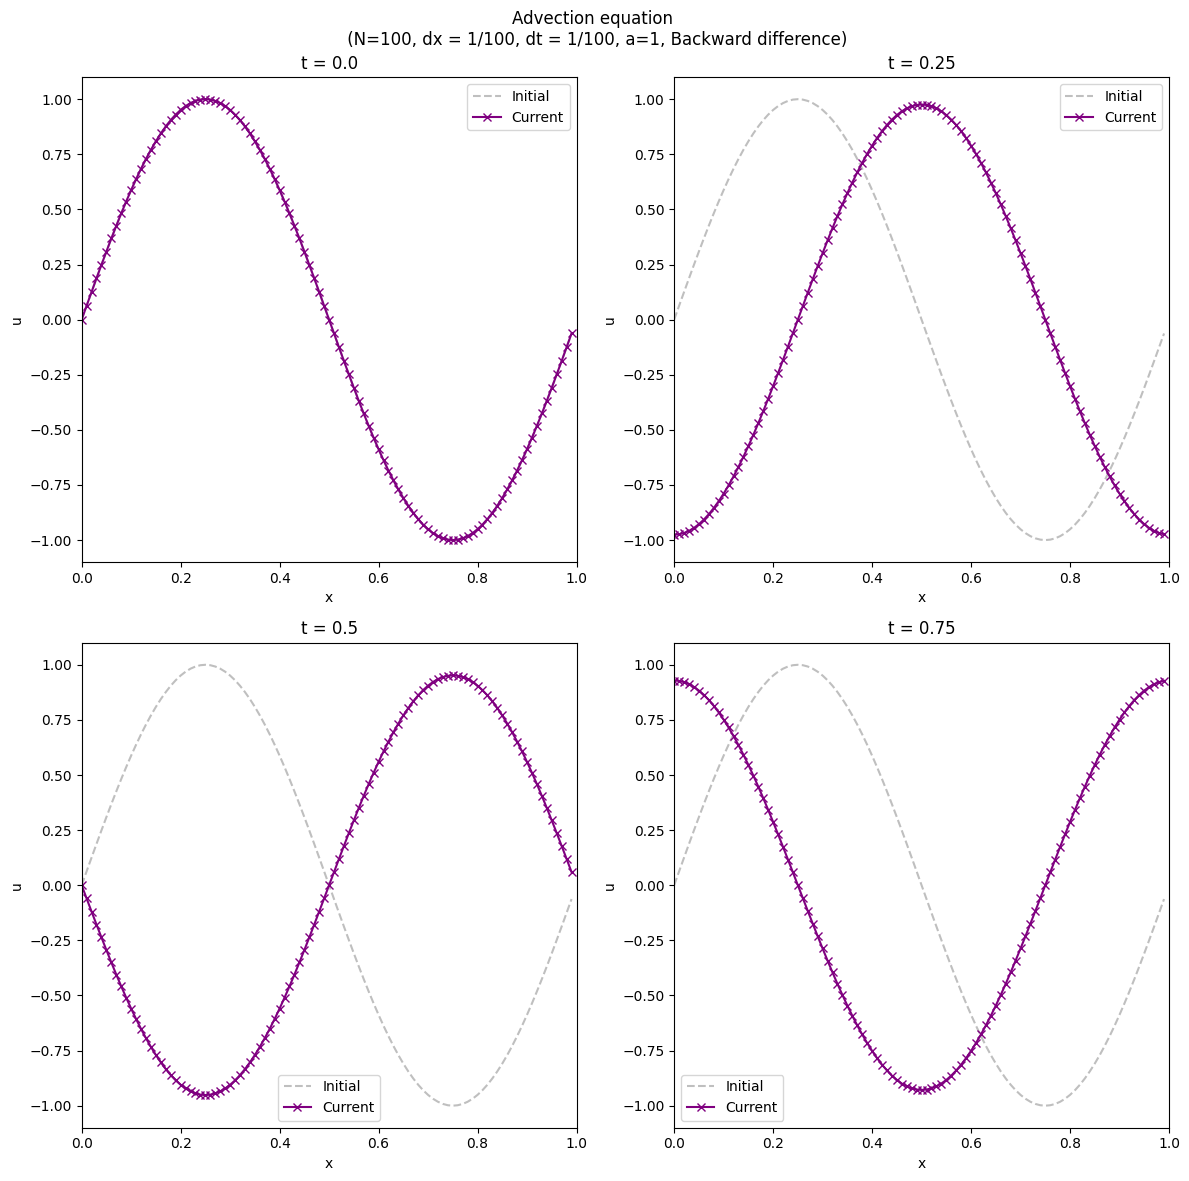

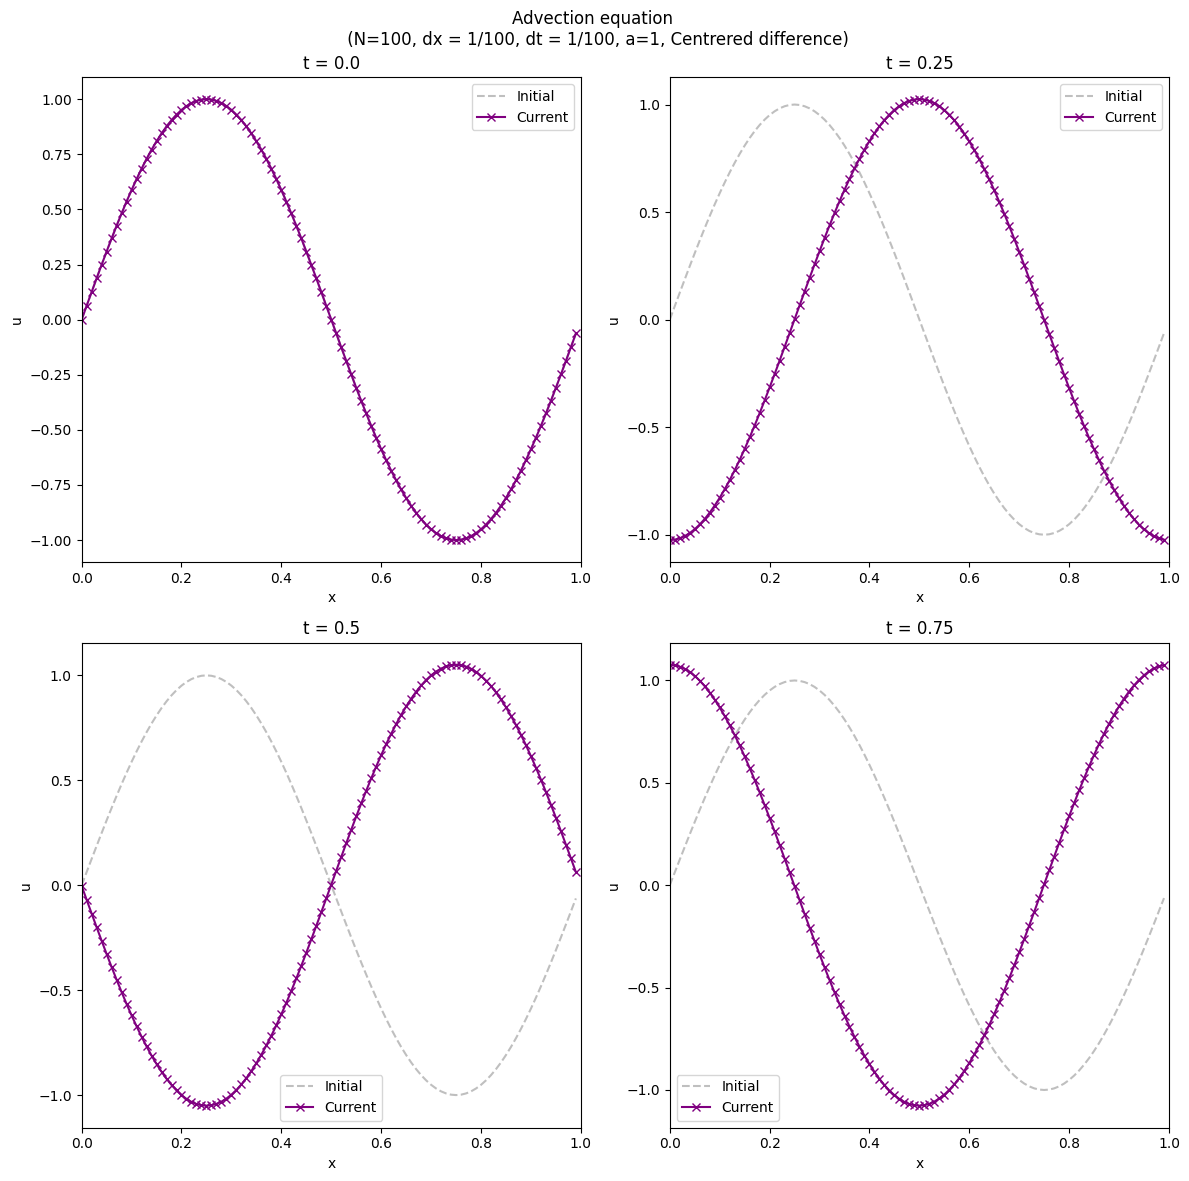

In [20]:
def demonstrate_scheme(scheme, iterative_rule):
    num_scheme = main.NumericalScheme(scheme, dt = 1/100)
    num_scheme.pass_numerical_scheme(iterative_rule)
    num_scheme.set_initial_condition(main.sine_map)


    fig, ax = plt.subplots(2, 2, figsize=(12,12))

    fig.suptitle(f"Advection equation \n (N=100, dx = 1/100, dt = 1/100, a=1, {scheme})")

    for i in range(4):
        x = i // 2
        y = i % 2
        
        num_scheme.draw_to(ax[x][y])
        ax[x][y].set_title(f"t = {num_scheme.get_t()}")
                
        for j in range(50):
            num_scheme.update()
            
    plt.tight_layout()  # This helps prevent title overlap
    plt.show()
            
for scheme, iter_rule in schemes.items():
    demonstrate_scheme(scheme, iter_rule)


In [21]:
def advection_scheme_error(scheme, i):
    x = i / scheme.N
    return scheme.init_condition(x-scheme.get_t()) - scheme.u[i]



np.float64(0.022756425482511)

In [49]:
write_each = 1
i_max = 2000

scheme_errs_dict = {}

for scheme, iter_rule in schemes.items():
    scheme_errs = []
    
    num_scheme = main.NumericalScheme(scheme, dt = 1/200)
    num_scheme.pass_numerical_scheme(iter_rule)
    num_scheme.set_initial_condition(main.sine_map)
    
    for i in range(i_max):
        curr_errs = []
        
        for i in range(num_scheme.N):
            curr_errs.append(advection_scheme_error(num_scheme, i))
            
        num_scheme.update()
        scheme_errs.append(curr_errs)
        
    scheme_errs_dict[scheme] = scheme_errs
        


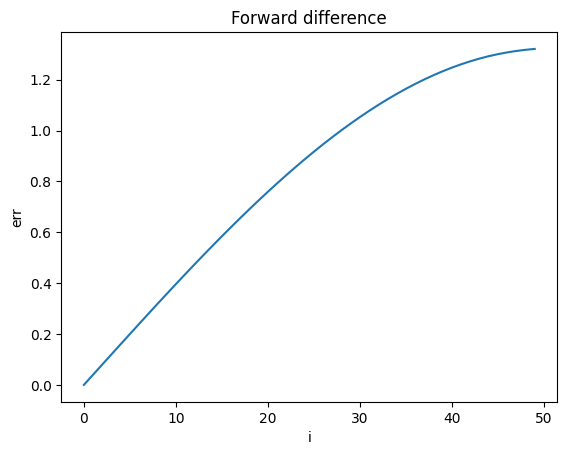

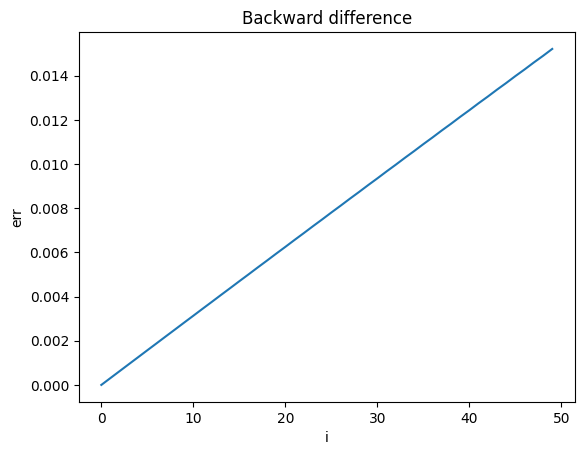

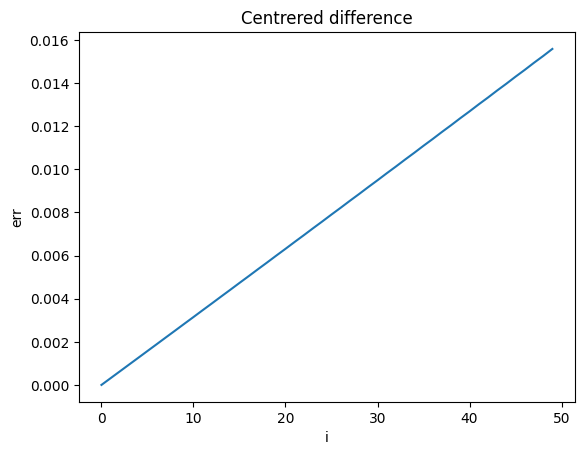

In [82]:

for scheme, data in scheme_errs_dict.items():
    means = []

    fig, ax = plt.subplots()

    for i in range(50):
        means.append((abs(np.array(data[i])).mean()))
        
    ax.plot(means)

    ax.set_xlabel('i')
    ax.set_ylabel('err')
    ax.set_title(scheme)

# 1.

All three schemes linearly grow in error.

# 2. trivial -- just swap backwards and forwards, symmetry.